# **1. Perkenalan Dataset**


## Tentang Dataset
Dataset ini merupakan no-labelled data transaksi e-commerce berbasis di UK yang menjual hadiah dan peralatan rumah tangga untuk dewasa dan anak-anak melalui website sejak 2007. Karakteristik utama dataset:

- Periode: Data transaksi selama satu tahun
- Volume: 500,000 baris data
- Cakupan: Transaksi internasional dengan pelanggan dari berbagai negara
- Tipe Pelanggan: Konsumen langsung dan bisnis kecil yang membeli dalam jumlah besar

## Deskripsi Fitur-Fitur
Dataset memiliki 8 kolom dengan detail sebagai berikut:

- TransactionNo (kategorikal): Nomor unik 6-digit untuk setiap transaksi. Kode "C" mengindikasikan pembatalan
- Date (numerik): Tanggal generasi transaksi
- ProductNo (kategorikal): Karakter unik 5-6 digit untuk identifikasi produk
- Product (kategorikal): Nama produk/item
- Price (numerik): Harga per unit dalam pound sterling (£)
- Quantity (numerik): Kuantitas produk per transaksi. Nilai negatif menunjukkan pembatalan
- CustomerNo (kategorikal): Nomor unik 5-digit untuk identifikasi pelanggan
- Country (kategorikal): Negara tempat tinggal pelanggan

Dataset source: [Kaggle](https://www.kaggle.com/datasets/gabrielramos87/an-online-shop-business).

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
# Data manipulation & analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Machine Learning & Clustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Distance metrics
from scipy.spatial.distance import cdist

# Feature Selection
from sklearn.feature_selection import SelectKBest, f_classif

# Mengatur opsi tampilan pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Mengabaikan warning
import warnings
warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

In [2]:
df = pd.read_csv('https://media.githubusercontent.com/media/fxrdhan/Machine-Learning-Project/refs/heads/main/data/Sales%20Transaction%20v.4a.csv')

KeyboardInterrupt: 

In [202]:
print("\nNumber of Missing Values per Column:")
df.isnull().sum()


Number of Missing Values per Column:


TransactionNo     0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
CustomerNo       55
Country           0
dtype: int64

In [203]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB
None


In [204]:
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.470,12,17490.000,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.650,36,13069.000,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.530,12,13069.000,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.650,12,13069.000,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.940,6,13069.000,United Kingdom


**Verifikasi Kriteria Minimal**:
- Jumlah baris: 536,350 (jauh melebihi minimal 2,500)
- Jumlah kolom: 8 (melebihi minimal 5)

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [205]:
print("Dataset Dimensions:", df.shape)
print("\nNumber of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Dataset Dimensions: (536350, 8)

Number of rows: 536350
Number of columns: 8


In [206]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB
None


In [207]:
print("\nData Types of Each Column:")
df.dtypes


Data Types of Each Column:


TransactionNo     object
Date              object
ProductNo         object
ProductName       object
Price            float64
Quantity           int64
CustomerNo       float64
Country           object
dtype: object

In [208]:
# Cek missing values
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
missing_df


Analisis Missing Values:


,Missing Values,Percentage
TransactionNo,0,0.000
Date,0,0.000
ProductNo,0,0.000
ProductName,0,0.000
Price,0,0.000
Quantity,0,0.000
CustomerNo,55,0.010
Country,0,0.000


In [209]:
df.describe()

,Price,Quantity,CustomerNo
count,536350.000,536350.000,536295.000
mean,12.662,9.919,15227.893
std,8.490,216.662,1716.583
min,5.130,-80995.000,12004.000
25%,10.990,1.000,13807.000
50%,11.940,3.000,15152.000
75%,14.090,10.000,16729.000
max,660.620,80995.000,18287.000


In [210]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation = df[numeric_columns].corr()
print("\nCorrelation Matrix:")
print(correlation)


Correlation Matrix:
            Price  Quantity  CustomerNo
Price       1.000    -0.007      -0.003
Quantity   -0.007     1.000      -0.002
CustomerNo -0.003    -0.002       1.000


Text(0.5, 0, 'Price (£)')

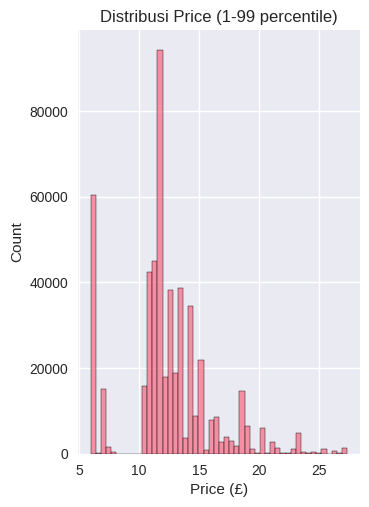

In [211]:
plt.subplot(1, 2, 1)
price_data = df[df['Price'].between(df['Price'].quantile(0.01), df['Price'].quantile(0.99))]
sns.histplot(data=price_data, x='Price', bins=50)
plt.title('Distribusi Price (1-99 percentile)')
plt.xlabel('Price (£)')

Text(0.5, 0, 'Quantity')

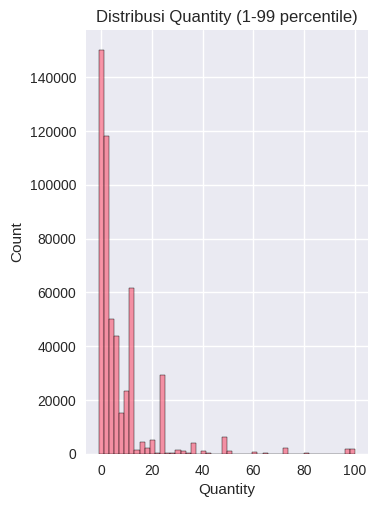

In [212]:
plt.subplot(1, 2, 2)
quantity_data = df[df['Quantity'].between(df['Quantity'].quantile(0.01), df['Quantity'].quantile(0.99))]
sns.histplot(data=quantity_data, x='Quantity', bins=50)
plt.title('Distribusi Quantity (1-99 percentile)')
plt.xlabel('Quantity')

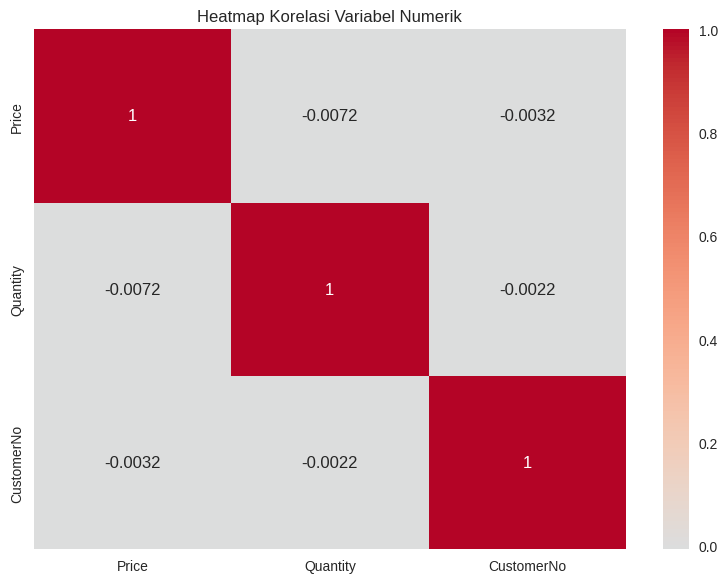

In [213]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap Korelasi Variabel Numerik')
plt.tight_layout()
plt.show()

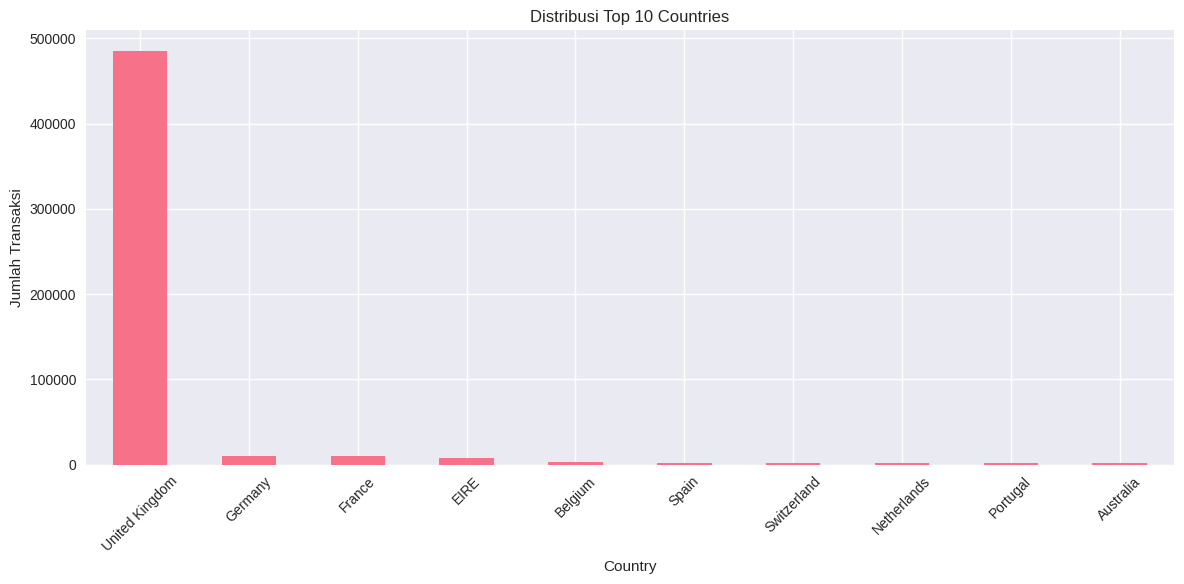

In [214]:
plt.figure(figsize=(12, 6))
df['Country'].value_counts().head(10).plot(kind='bar')
plt.title('Distribusi Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [215]:
print("\nKESIMPULAN EDA:")
print("-"*50)
print("\n1. Struktur Data:")
print(f"- Dataset memiliki {df.shape[0]} baris dan {df.shape[1]} kolom")
print(f"- Terdapat {len(numeric_columns)} kolom numerik dan {len(df.columns) - len(numeric_columns)} kolom kategorikal")

print("\n2. Missing Values:")
print(f"- Hanya kolom CustomerNo yang memiliki missing values ({missing_values['CustomerNo']} baris)")
print(f"- Persentase missing values sangat kecil ({missing_percentage['CustomerNo']:.2f}%)")

print("\n3. Distribusi dan Korelasi:")
print("- Price: Range £{:.2f} - £{:.2f}, dengan rata-rata £{:.2f}".format(
    df['Price'].min(), df['Price'].max(), df['Price'].mean()))
print("- Quantity: Range {} - {}, dengan rata-rata {:.2f}".format(
    df['Quantity'].min(), df['Quantity'].max(), df['Quantity'].mean()))
print("- Korelasi antara Price dan Quantity:", correlation.loc['Price', 'Quantity'])

print("\n4. Insight Visualisasi:")
print("- Distribusi Price menunjukkan right-skewed distribution")
print("- Quantity memiliki outlier yang signifikan")
print("- Terdapat beberapa negara dominan dalam dataset")


KESIMPULAN EDA:
--------------------------------------------------

1. Struktur Data:
- Dataset memiliki 536350 baris dan 8 kolom
- Terdapat 3 kolom numerik dan 5 kolom kategorikal

2. Missing Values:
- Hanya kolom CustomerNo yang memiliki missing values (55 baris)
- Persentase missing values sangat kecil (0.01%)

3. Distribusi dan Korelasi:
- Price: Range £5.13 - £660.62, dengan rata-rata £12.66
- Quantity: Range -80995 - 80995, dengan rata-rata 9.92
- Korelasi antara Price dan Quantity: -0.007181751879960703

4. Insight Visualisasi:
- Distribusi Price menunjukkan right-skewed distribution
- Quantity memiliki outlier yang signifikan
- Terdapat beberapa negara dominan dalam dataset


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [216]:
#Type your code here

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [217]:
#Type your code here

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [218]:
#Type your code here

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [219]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [220]:
#Type your code here

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [221]:
#Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.